In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [3]:
rho_liquid = 1000  # Density of liquid water in kg/m^3
rho_air0 = 1.225  # Sea level air density in kg/m^3
r_0 = 1e-2  # Mixing ratio at sea level
H_rho_H2O_meters = 1.56 * 1000  # Scale height for water vapor density in meters
rho_vapor0 = r_0 * rho_air0  # Density of water vapor at sea level in kg/m^3

In [4]:
# Define the integrand function for the density of water vapor
def integrand(z):
    return rho_vapor0 * np.exp(-z / H_rho_H2O_meters)

# Define a function to calculate cumulative water vapor thickness up to height z
def cumulative_water_vapor_thickness(z):
    return quad(integrand, 0, z)[0] / rho_liquid

In [5]:
# Range of z values (altitude in meters) to consider, up to 30 km
z_values = np.linspace(0, 30000, 500)  

$$
w(z) = \frac{1}{\rho_{\text{liquid}}} \int_{0}^{z} \rho_{\text{vapor}}(z') \, dz'
$$

In [6]:
# Calculate w(z) for each z in z_values
# w(z) is the thickness of layer of liquid water
w_z_values = [cumulative_water_vapor_thickness(z) for z in z_values]

In [18]:
w_z_values_mm = np.array(w_z_values)*1000.

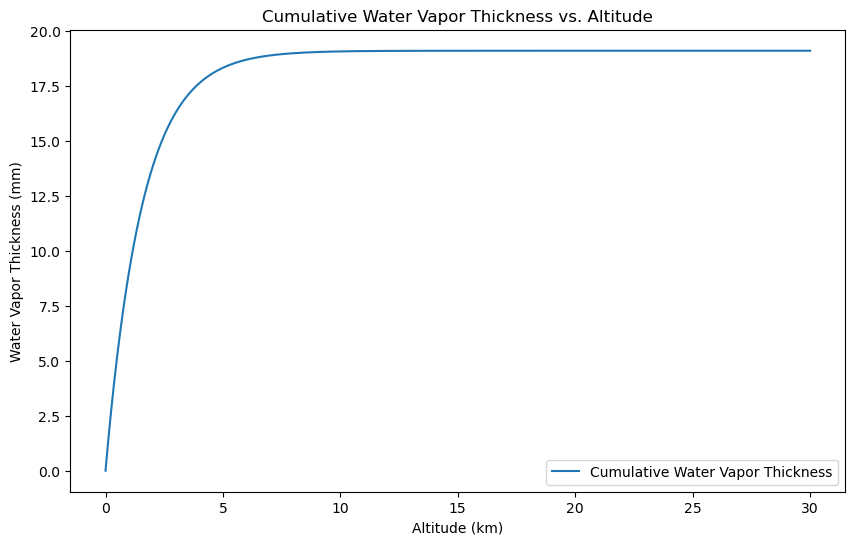

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(z_values / 1000, w_z_values_mm, label='Cumulative Water Vapor Thickness')
plt.xlabel('Altitude (km)')
plt.ylabel('Water Vapor Thickness (mm)')
plt.title('Cumulative Water Vapor Thickness vs. Altitude')
plt.legend();